# Supervised Learning - LinearRegression

Description of data

Dataset: airq4.dat

Source: U.S. Department of Transportation

Description: Average airfare and weekly passenger traffic for 4177
city pairs for the 4th quarter of 2000 and 2001

Variables / Columns

City1   1-3
City2  7-9
Population of City1 (1000s) 13-20
Population of City2 (1000s) 23-30
Distance between cities (Miles)  33-36
Average Fare 2000q4 (Dollars)  39-44
Average weekly passengers 2000q4   47-54
Average Fare 2001q4 (Dollars)    57-62
Average weekly passengers 2001q4  65-72 

In [ ]:
import pandas as pd
import io
import requests

In [131]:
#Import and store the data in a data frame
url="http://users.stat.ufl.edu/~winner/data/airq402.dat"
s=requests.get(url).content
colnames = ['City1','City2','Average fare1','Distance','Average weekly passengers','market leading airline',
           'market share1','Average fare2','Low price airline','market share2','price']
dataframe_transport =pd.read_csv(io.StringIO(s.decode('utf-8')),sep="\s+",names=colnames)
dataframe_transport.head()

,City1,City2,Average fare1,Distance,Average weekly passengers,market leading airline,market share1,Average fare2,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [132]:
dataframe_transport.dtypes

City1                         object
City2                         object
Average fare1                float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share1                float64
Average fare2                float64
Low price airline             object
market share2                float64
price                        float64
dtype: object

In [133]:
#Remove the outliers from the data
dataframe_transport['City1'] = dataframe_transport['City1'].astype('category').cat.codes
dataframe_transport['City2'] = dataframe_transport['City2'].astype('category').cat.codes
dataframe_transport['market leading airline'] = dataframe_transport['market leading airline'].astype('category').cat.codes
dataframe_transport['Low price airline'] = dataframe_transport['Low price airline'].astype('category').cat.codes
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    minimum_cap  = q1- (1.5*iqr)
    maximum_cap  = q3+ (1.5*iqr)
    for index, row in df_in.iterrows():
        if row[col_name] < minimum_cap or row[col_name] > maximum_cap:
            print("Outlier exists for",col_name," on row",index, "with value:", row[col_name],"With min val",minimum_cap," and max val",maximum_cap)
            df_in.drop(index,axis=0)
    df_in = df_in.loc[(df_in[col_name] > minimum_cap) & (df_in[col_name] < maximum_cap)]
    return df_in

df_modified = remove_outlier(dataframe_transport,'City1')
df_modified = remove_outlier(df_modified,'City2')
df_modified = remove_outlier(df_modified,'Average fare1')
df_modified = remove_outlier(df_modified,'Distance')
df_modified = remove_outlier(df_modified,'Average weekly passengers')
df_modified = remove_outlier(df_modified,'market leading airline')
df_modified = remove_outlier(df_modified,'market share1')
df_modified = remove_outlier(df_modified,'Average fare2')
df_modified = remove_outlier(df_modified,'Low price airline')
df_modified = remove_outlier(df_modified,'market share2')
df_modified = remove_outlier(df_modified,'price')
df_modified.shape

Outlier exists for Average fare1  on row 197 with value: 314.01 With min val 18.84875000000001  and max val 304.51874999999995
Outlier exists for Average fare1  on row 212 with value: 307.42 With min val 18.84875000000001  and max val 304.51874999999995
Outlier exists for Average fare1  on row 213 with value: 355.15 With min val 18.84875000000001  and max val 304.51874999999995
Outlier exists for Average fare1  on row 328 with value: 321.4 With min val 18.84875000000001  and max val 304.51874999999995
Outlier exists for Average fare1  on row 607 with value: 313.22 With min val 18.84875000000001  and max val 304.51874999999995
Outlier exists for Average fare1  on row 709 with value: 330.28 With min val 18.84875000000001  and max val 304.51874999999995
Outlier exists for Average fare1  on row 714 with value: 317.2 With min val 18.84875000000001  and max val 304.51874999999995
Outlier exists for Average fare1  on row 737 with value: 361.57 With min val 18.84875000000001  and max val 304.5

Outlier exists for Average fare2  on row 352 with value: 328.35 With min val 11.204999999999998  and max val 317.765
Outlier exists for Average fare2  on row 936 with value: 331.56 With min val 11.204999999999998  and max val 317.765
Outlier exists for Average fare2  on row 994 with value: 329.2 With min val 11.204999999999998  and max val 317.765
Outlier exists for price  on row 84 with value: 314.31 With min val 37.885000000000005  and max val 245.765
Outlier exists for price  on row 85 with value: 250.02 With min val 37.885000000000005  and max val 245.765
Outlier exists for price  on row 86 with value: 268.1 With min val 37.885000000000005  and max val 245.765
Outlier exists for price  on row 107 with value: 255.22 With min val 37.885000000000005  and max val 245.765
Outlier exists for price  on row 110 with value: 264.17 With min val 37.885000000000005  and max val 245.765
Outlier exists for price  on row 215 with value: 287.38 With min val 37.885000000000005  and max val 245.765


(877, 11)

In [135]:
#Drop the independent variables which has less than 0.1 correlation with the dependent variable
df_modified.corr()

,City1,City2,Average fare1,Distance,Average weekly passengers,market leading airline,market share1,Average fare2,Low price airline,market share2,price
City1,1.000000,0.314515,-0.088956,0.036996,0.012836,0.040807,-0.068994,-0.108058,0.034726,0.093362,-0.025103
City2,0.314515,1.000000,-0.036078,0.142254,-0.035572,-0.006842,-0.077245,-0.046704,0.020579,0.049886,0.031952
Average fare1,-0.088956,-0.036078,1.000000,0.512280,-0.194769,-0.317622,-0.202205,0.979853,-0.166884,-0.498025,0.837329
Distance,0.036996,0.142254,0.512280,1.000000,-0.123024,-0.124651,-0.546091,0.480295,-0.178180,-0.361306,0.531995
Average weekly passengers,0.012836,-0.035572,-0.194769,-0.123024,1.000000,-0.027798,0.018146,-0.160751,0.071912,0.074210,-0.206307
market leading airline,0.040807,-0.006842,-0.317622,-0.124651,-0.027798,1.000000,0.099087,-0.298120,0.265071,0.158052,-0.296574
market share1,-0.068994,-0.077245,-0.202205,-0.546091,0.018146,0.099087,1.000000,-0.188915,0.137588,0.280194,-0.309026
Average fare2,-0.108058,-0.046704,0.979853,0.480295,-0.160751,-0.298120,-0.188915,1.000000,-0.154222,-0.522616,0.790611
Low price airline,0.034726,0.020579,-0.166884,-0.178180,0.071912,0.265071,0.137588,-0.154222,1.000000,0.196413,-0.215315
market share2,0.093362,0.049886,-0.498025,-0.361306,0.074210,0.158052,0.280194,-0.522616,0.196413,1.000000,-0.261714


In [136]:
#Drop the independent variables which has less than 0.1 correlation with the dependent variable
# we can drop City1, City2,  
#as they have less correlation value less than 0.1 with the dependent variable 
df_modified = df_modified.drop(['City1'],axis=1)
df_modified = df_modified.drop(['City2'],axis=1)
df_modified.head()

,Average fare1,Distance,Average weekly passengers,market leading airline,market share1,Average fare2,Low price airline,market share2,price
0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


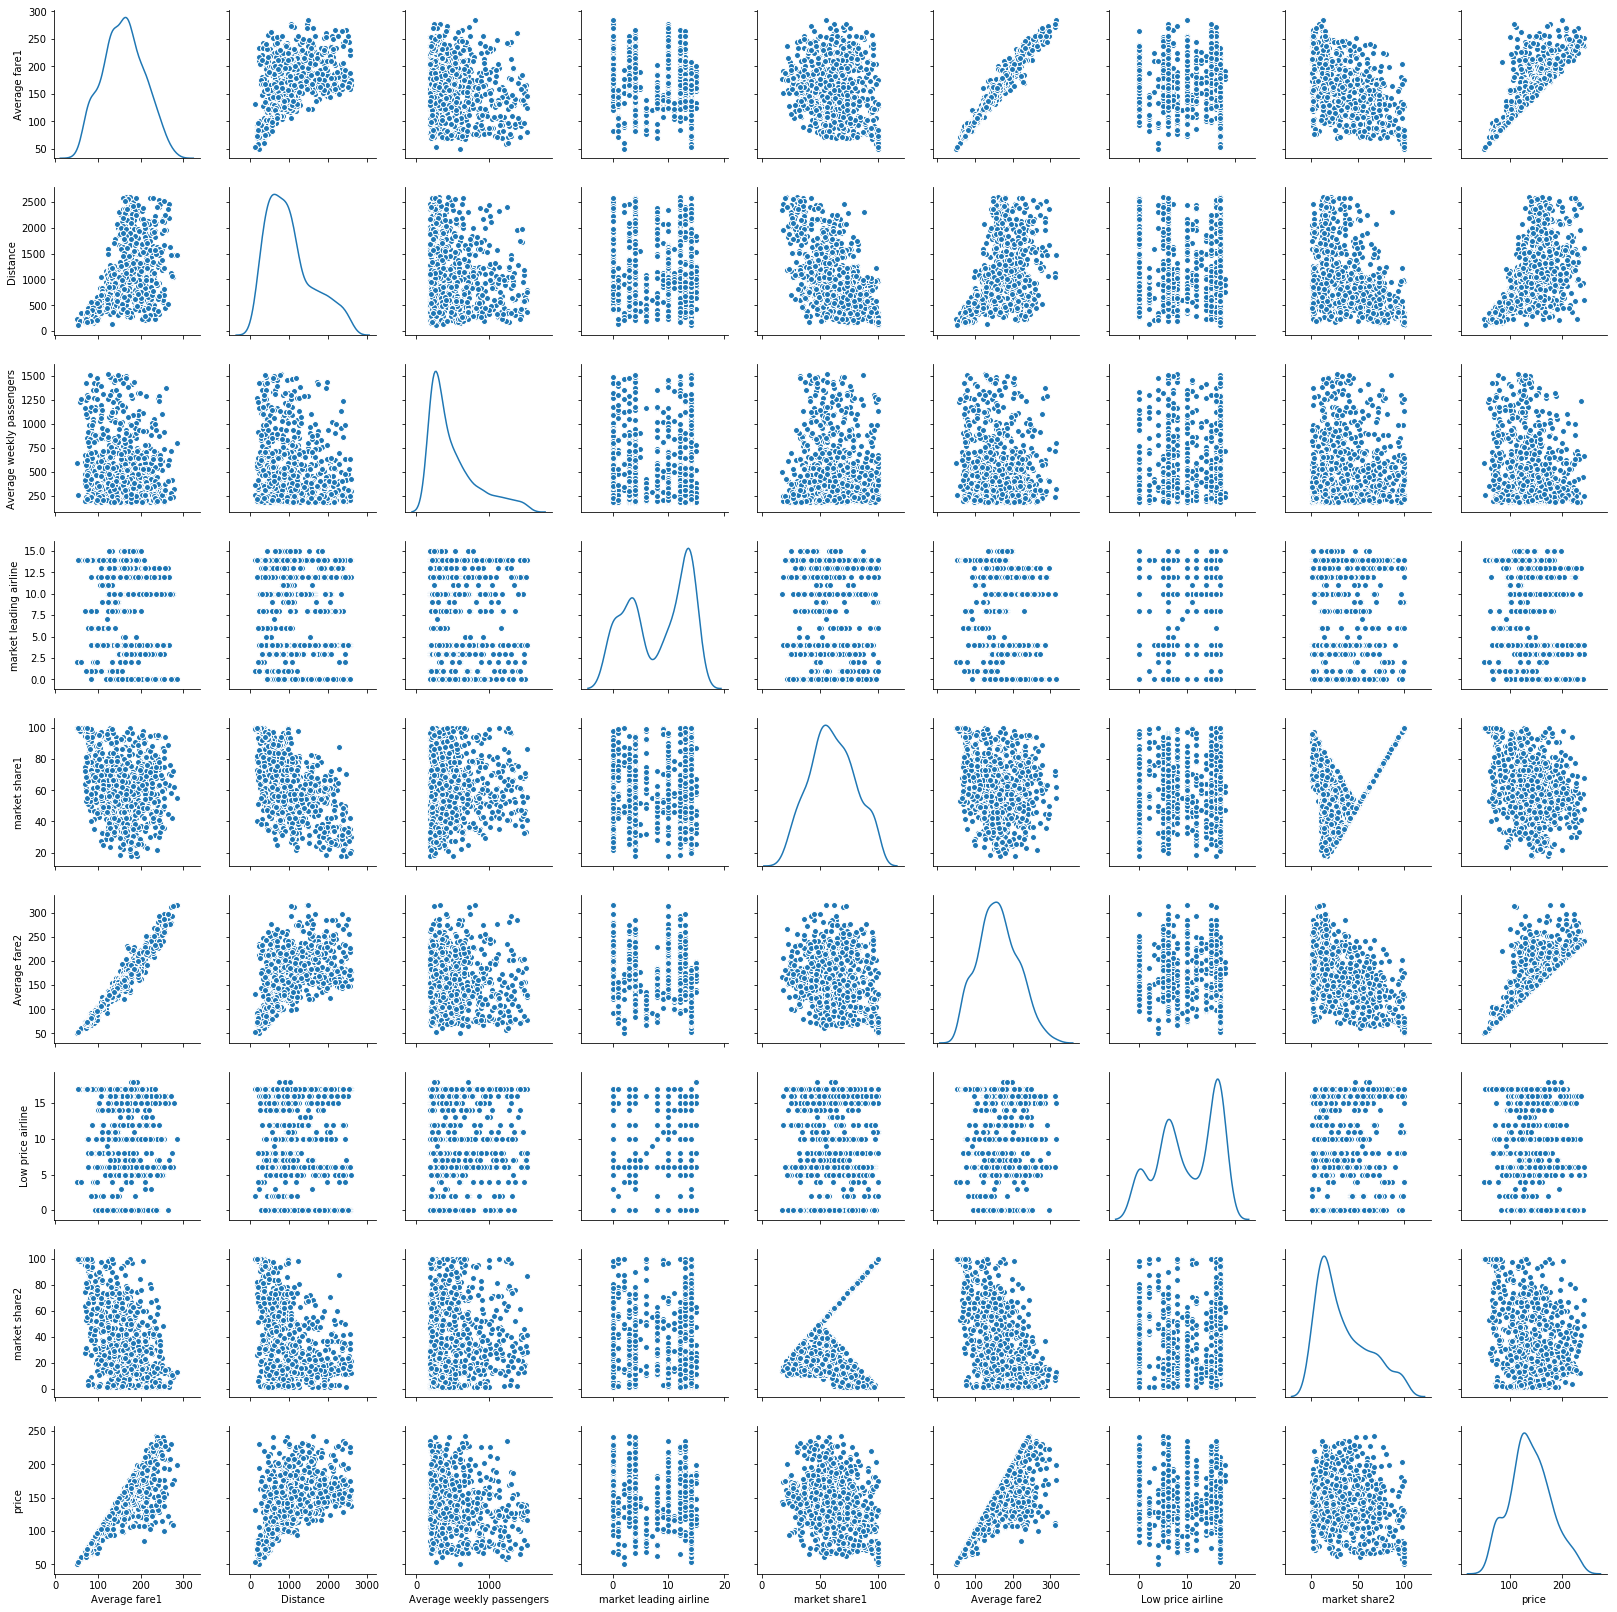

In [148]:
#Create scatter Plot of Independent Variable vs Dependent Variable.
import seaborn as sns
sns.pairplot(df_modified,diag_kind='kde')

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [144]:
#Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable
X  = df_modified.iloc[:,1:9]
Y  = df_modified.iloc[:,0]
#Divide the data set into training and test data set and build a Multiple Linear Regression model. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)
#Print the accuracy of the overall model
model_score = model.score(X_test, y_test)
print('Accuracy of the model',model_score)

Accuracy of the model 0.9650514712259195


In [145]:
#Print the coefficients & intercepts of the linear regression model 
print('Intercept of the model',model.intercept_)

7.236487033545046

In [146]:
print('Coefficient of the model',model.coef_)

Coefficient of the model [ 0.00218789 -0.00418366 -0.20389656  0.07736041  0.73944072  0.08162949
 -0.04092125  0.21322449]
